In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom



In [2]:
#plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams["figure.subplot.left"] = 0.18
plt.rcParams["figure.subplot.right"] = 0.95
plt.rcParams["figure.subplot.bottom"] = 0.15
plt.rcParams["figure.subplot.top"] = 0.95
plt.rcParams['font.family'] ='sans-serif'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 1.2

In [3]:
h = np.linspace(0.0, 1.0, num=501)[1::] # exclude the first because it can diverge
dh = h[1] - h[0]
h = h - dh/2
kappa = np.arange(1,300)
k = np.arange(0,200)

1.0


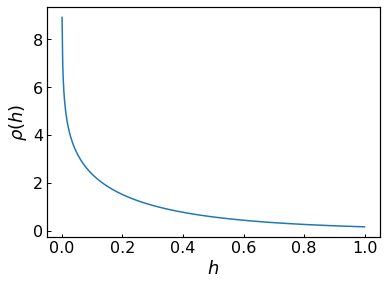

In [4]:
def _rho(alpha=0.8, x_0=0.3):
    # Weibull distribution
    ro = alpha/x_0*(h/x_0)**(alpha-1) * np.exp( -(h/x_0)**alpha )
    return ro / (np.sum(ro)*dh)   # normalize to reduce numerical error

rho = _rho()
print(np.sum(rho)*dh)
plt.xlabel(r"$h$")
plt.ylabel(r"$\rho(h)$")
plt.plot(h, rho, label=r'$\rho(h)$')

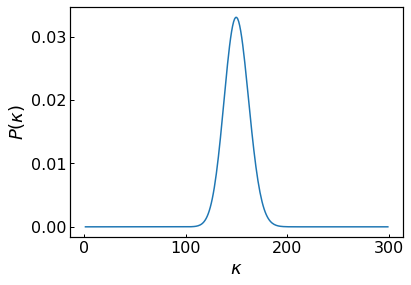

In [5]:
def _p_kappa():
    # delta function
    #return np.where(kappa == 150, 1, 0)
    # binomial distribution
    _n = 5000
    _p = 0.03
    b = binom(_n, _p)
    pmf = b.pmf(kappa)
    return pmf / np.sum(pmf)   # normalize to reduce error
    # normal distribution (for now)
    #mean = 150.0
    #sigma = 30.0
    #return 1.0/math.sqrt(2.0*math.pi*sigma**2) * np.exp( -(kappa-mean)**2/(2.0*sigma**2) )

fig = plt.figure(figsize=(6,4))
    
p_kappa = _p_kappa()
plt.xlabel(r"$\kappa$")
plt.ylabel(r"$P(\kappa)$")
plt.plot(kappa,p_kappa)

In [6]:
def r(h1, h2):
    # generalized mean
    # beta = -1
    # return ((h1**beta+h2**beta)/2)**(1.0/beta)
    return np.minimum(h1,h2)
    # return np.maximum(h1,h2)
    # return np.sqrt(h1*h2)

(500,)


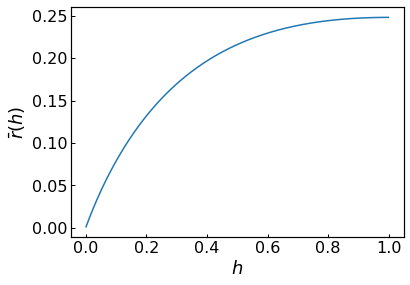

In [7]:
def _r_bar_h():
    # sum_{h'} rho(h') r(h,h')
    h_prime = np.copy(h).reshape([1,h.shape[0]])
    h_ = h.reshape( [h.shape[0],1] )
    #print(h,h_prime)
    rhh = r(h_, h_prime)
    #print(rhh)
    dr = rhh*rho.reshape([1,h.shape[0]])*dh
    #print(dr)
    return np.sum(dr,axis=1)
    
r_bar_h = _r_bar_h()
print(r_bar_h.shape)
plt.xlabel(r"$h$")
plt.ylabel(r"$\bar{r}(h)$")
plt.plot(h, r_bar_h)

In [8]:
def r_bar():
    y = r_bar_h * rho * dh
    return np.sum(y)

r_bar()

def r_bar():
    y = r_bar_h * rho * dh
    return np.sum(y)

r_bar()

0.12005662658949999

(200, 500, 299)


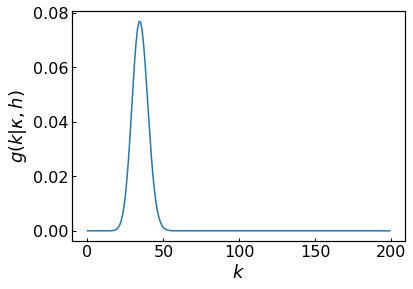

In [9]:
def _propagator():
    # g(k|h,kappa) = \binom(kappa, k) r(h)^k ( 1-r(h))^{kappa-k}
    p = r_bar_h
    _p = p.reshape([1,p.shape[0],1])
    #print(p, _kappa)
    _kappa = kappa.reshape([1,1,kappa.shape[0]])
    b = binom(_kappa, _p)
    #print(b.shape)
    _k = k.reshape([k.shape[0],1,1])
    #print(_k)
    return b.pmf(_k)

#k = np.array([9,10,11])
#_k = np.arange(0,100)
#h = np.array( [0.2,0.3,0.4,0.5] )
#_h = np.linspace(0.0, 1.0, num=100)[1::]
#kappa = np.array([100,110,120,130,140])
#_kappa = np.arange(0,150)
g = _propagator()
print(g.shape)
plt.xlabel(r"$k$")
plt.ylabel(r"$g(k|\kappa,h)$")
plt.plot(k, g[:,300,150])
#plt.plot(h, g[20,:,100])
#plt.plot(kappa, g[30,50,:])

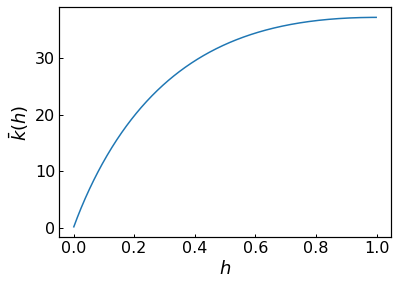

In [10]:
def _k_bar_h():
    kappa_mean = np.sum( p_kappa * kappa )
    #print(kappa_mean)
    return kappa_mean * r_bar_h

k_bar_h = _k_bar_h()
plt.xlabel(r"$h$")
plt.ylabel(r"$\bar{k}(h)$")
plt.plot(h, k_bar_h)

array([0.04574163, 0.0383794 , 0.03429689, 0.03197455, 0.03035309,
       0.02912125, 0.02813764, 0.0273254 , 0.02663849, 0.02604742])

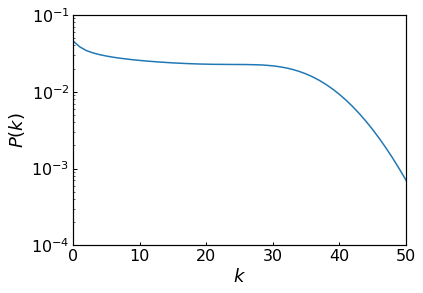

In [11]:
def _P_k():
    _g = g * rho.reshape([1,h.shape[0],1]) * p_kappa.reshape([1,1,kappa.shape[0]]) * dh
    return np.sum(_g, axis=(1,2))
    #gh = np.sum(g_rho, axis = 1) * dh
    #gh_Pkappa = gh * p_kappa.reshape([1, kappa.shape[0]])
    #return np.sum(gh_Pkappa, axis = 1)

P_k = _P_k()
plt.xlabel(r"$k$")
plt.ylabel(r"$P(k)$")
plt.yscale("log")
plt.ylim(1.0e-4,1.0e-1)
plt.xlim(0,50)
plt.plot(k, P_k)
P_k[0:10]

In [12]:
# checking  <k> = \sum_{k} k P(k) = <kappa> * \bar{r}

(np.sum(k * P_k), r_bar() * np.sum(kappa*p_kappa))

(18.008493988426068, 18.00849398842536)

In [13]:
# <k^2> = \sum_{k} k^2 P(k)
#   = <kappa>rbar + <kappa(kappa-1)> \sum_{h} rbar(h)^2 rho(h)

_x = np.sum(k * k * P_k)
_y = np.sum(kappa * p_kappa) * r_bar() + np.sum(kappa*(kappa-1)*p_kappa) * np.sum(r_bar_h*r_bar_h*rho)*dh
(_x, _y)

(479.2669794612782, 479.26697946125677)

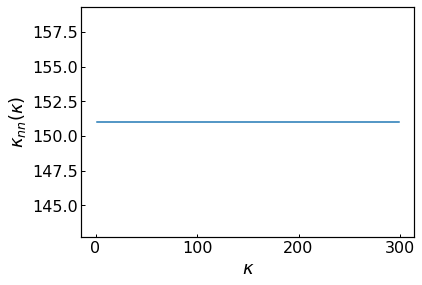

In [14]:
# degree correlation

def _kappa_nn_bar_kappa():
    # \bar{\kappa}_{nn}(\kappa) = \sum_{\kappa'} \kappa' p_o(\kappa' | \kappa)
    # tentatively assume P(kappa'|kappa) = P(kappa)
    kappa_mean = np.sum(kappa * p_kappa)
    return np.full(kappa.shape, kappa_mean + 1)

kappa_nn_bar_kappa = _kappa_nn_bar_kappa()
plt.xlabel(r"$\kappa$")
plt.ylabel(r"$\kappa_{nn}(\kappa)$")
plt.plot(kappa, kappa_nn_bar_kappa)

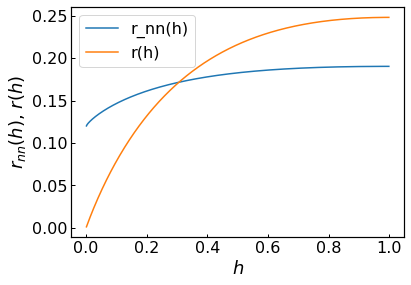

In [15]:
def _r_nn_h():
    # h, h_prime are axis=0,1, respectively.
    nh = h.shape[0]
    h_prime = np.copy(h).reshape([1,nh])
    rho_h_prime = rho.reshape([1,nh])
    r_bar_h_prime = r_bar_h.reshape([1,nh])
    r_bar_h_ = r_bar_h.reshape( [nh,1] )
    h_ = h.reshape( [nh,1] )
    x = r( h_, h_prime ) * rho_h_prime * r_bar_h_prime / r_bar_h_
    return np.sum( x, axis=1 ) * dh
    
r_nn_h = _r_nn_h()
plt.xlabel(r"$h$")
plt.ylabel(r"$r_{nn}(h)$, $r(h)$")
plt.plot(h, r_nn_h, label="r_nn(h)")
plt.plot(h, r_bar_h, label="r(h)")
plt.legend()

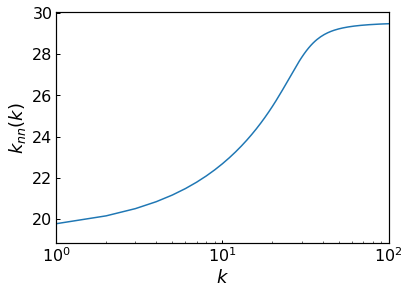

In [16]:
def _k_nn_bar_k():
    # k, h, kappa are axis=0,1,2, respectively
    nk = k.shape[0]
    nh = h.shape[0]
    nkappa = kappa.shape[0]
    P_k_ = P_k[ P_k > 0 ]
    p_k_ = P_k_.reshape( [P_k_.shape[0],1,1,] )
    _g = g[P_k > 0,:,:]
    #print(p_k_.shape)
    rho_h_ = rho.reshape( [1,nh,1] )
    p_kappa_ = p_kappa.reshape( [1,1,nkappa] )
    r_nn_h_ = r_nn_h.reshape( [1,nh,1] )
    kappa_nn_bar_kappa_ = kappa_nn_bar_kappa.reshape( [1,1,nkappa] )
    return 1 + np.sum( _g / p_k_ * rho_h_ * p_kappa_ * r_nn_h_ * (kappa_nn_bar_kappa_-1), axis=(1,2) ) * dh;

k_nn_bar_k = _k_nn_bar_k()
#print(k_nn_bar_k)
plt.xlabel(r"$k$")
plt.ylabel(r"$k_{nn}(k)$")
plt.xscale("log")
plt.xlim(1.0e0, 1.0e2)
plt.plot(k[P_k > 0], k_nn_bar_k)

In [17]:
np.sum(P_k[P_k > 0] * k_nn_bar_k)
np.sum(k * P_k)
#P_k[ P_k > 0 ].shape

18.008493988426068

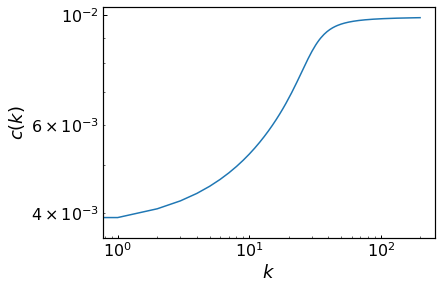

In [18]:
# clustering coefficient

def _p_hprime_given_h():
    # h,h' are axis-0,1
    # p(h'|h) = r(h',h) rho(h') / r_bar(h)
    nh = h.shape[0]
    h_ = h.reshape( (nh,1) )
    h_prime = h.reshape( (1,nh) )
    rho_hprime = rho.reshape( (1,nh) )
    rbar_h = r_bar_h.reshape( (nh,1) )
    return r(h_, h_prime) * rho_hprime / rbar_h

p_hprime_given_h = _p_hprime_given_h()
#plt.plot(h, p_hprime_given_h[:,100])
#h_bar_given_h = np.sum( p_hprime_given_h * h.reshape( (1,h.shape[0]) ), axis=1) * dh
#plt.plot(h, h_bar_given_h)

def _c_h():
    # h, h', h'' are axis-0,1,2, respectively
    # \sum_{h', h''} = r(h', h'') * p(h'|h) * p(h''|h)
    nh = h.shape[0]
    h_ = h.reshape( (nh,1,1) )
    h_prime = h.reshape( (1,nh,1) )
    h_prime2 = h.reshape( (1,1,nh) )
    p_hprime_given_h_ = p_hprime_given_h.reshape( (nh,nh,1) )
    p_hprime2_given_h_ = p_hprime_given_h.reshape( (nh,1,nh) )
    r_ = r(h_prime, h_prime2).reshape( (1,nh,nh) )
    return np.sum( r_ * p_hprime_given_h_ * p_hprime2_given_h_, axis=(1,2) ) * dh * dh

c_h = _c_h()
#plt.plot(h, c_h)

def _c_k():
    # k, h, kappa are axis-0,1,2, respectively
    # 1/P(k) * \sum_{h,\kappa} g(k|h,\kappa) rho(h) P(\kappa) c_h c_o(\kappa)
    nh = h.shape[0]
    nk = k.shape[0]
    nkappa = kappa.shape[0]
    _rho_h = rho.reshape( (1,nh,1) )
    _p_kappa = p_kappa.reshape( (1,1,nkappa) )
    _c_h = c_h.reshape( (1,nh,1) )
    #_c_o_kappa = 0.1
    # tentatively assume c_o(kappa) = 0.1 * kappa^{-1}
    # _c_o_kappa = 0.1 / (kappa**2)
    _c_o_kappa = 0.03
    return 1.0 / P_k * np.sum( g * _rho_h * _p_kappa * _c_h * _c_o_kappa, axis=(1,2) ) * dh

c_k = _c_k()
plt.yscale("log")
plt.xscale("log")
plt.xlabel(r"$k$")
plt.ylabel(r"$c(k)$")
plt.plot(k, c_k)

#c_h_kappa = _c_h_kappa()
#plt.plot(h, c_h_kappa[:,150])

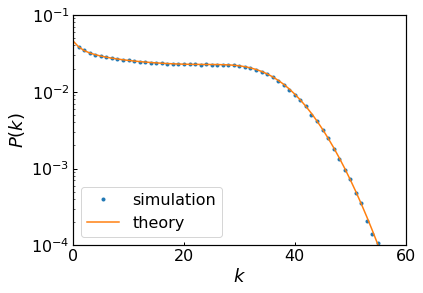

In [19]:
# sim_result_dir = "/Users/murase/work/oacis/public/Result_development/5bcd5bb6d12ac6187c093163/5c09fecbd12ac6a7d393ef29/5c0a13c6d12ac6a7d393f002/"
sim_result_dir = "sim_result/fig2/"
savefig = False

# comparison with simulation
def _compare_pk():
    path = sim_result_dir + "degree_distribution_ave.dat"
    d = np.loadtxt(path)
    plt.yscale("log")
    plt.ylim(1.0e-4,1.0e-1)
    plt.xlim(0,60)
    plt.xlabel(r"$k$")
    plt.ylabel(r"$P(k)$")
    plt.xticks(np.arange(0, 80, step=20))
    plt.plot(d[:,0], d[:,1]/5000, '.', label='simulation')
    plt.plot(k, P_k, label='theory')
    plt.legend()
    if savefig:
        plt.savefig("pk_sim.pdf")
    
_compare_pk()
    
    

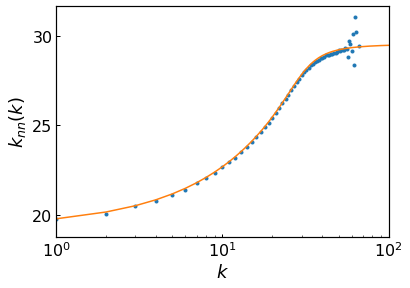

In [20]:
def _compare_knn():
    path = sim_result_dir + "neighbor_degree_correlation_ave.dat"
    d = np.loadtxt(path)
    plt.xscale("log")
    plt.xlim(1.0e0, 1.0e2)
    plt.yticks(np.arange(20, 35, step=5))
    plt.xlabel(r"$k$")
    plt.ylabel(r"$k_{nn}(k)$")
    plt.plot(d[:,0], d[:,1], '.')
    plt.plot(k[P_k > 0], k_nn_bar_k)
    if savefig:
        plt.savefig("knn_sim.pdf")
    
_compare_knn()

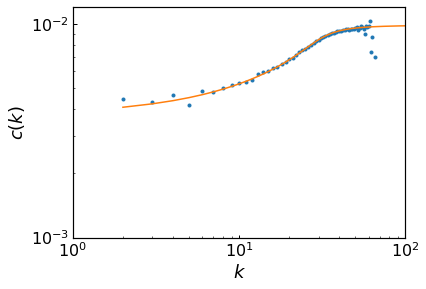

In [21]:
def _compare_ck():
    path = sim_result_dir + "cc_degree_correlation_ave.dat"
    d = np.loadtxt(path)
    plt.ylim(1e-3,1.2e-2)
    plt.xlim(1e0,1e2)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(r"$k$")
    plt.ylabel(r"$c(k)$")
    plt.plot(d[:,0], d[:,1], '.')
    plt.plot(k[2:], c_k[2:])
    plt.yticks([0.001,0.01])
    if savefig:
        plt.savefig("ck_sim.pdf")

_compare_ck()

In [22]:
def _compare_average_c():
    return np.sum( c_k[2:]*P_k[2:])

_compare_average_c()
# numerical result : 0.006458 (http://localhost:3000/parameter_sets/5c09fecbd12ac6a7d393ef29?plot_type=line&x_axis=alpha&y_axis=.ClusteringCoefficient&series=&irrelevants=#!tab-plot)

0.006136352517824576

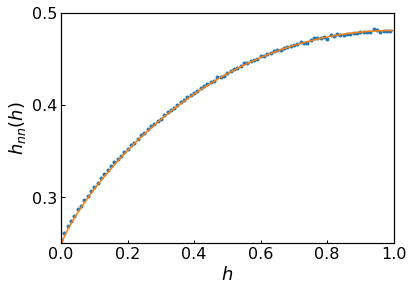

In [23]:
def _h_nn_h():
    # h, h_prime are axis=0,1, respectively.
    nh = h.shape[0]
    h_prime = np.copy(h).reshape([1,nh])
    rho_h_prime = rho.reshape([1,nh])
    h_ = h.reshape( [nh,1] )
    r_bar_h_ = r_bar_h.reshape( [nh,1] )
    return np.sum( r(h_,h_prime)*rho_h_prime*h_prime / r_bar_h_, axis=1 ) * dh

h_nn_h = _h_nn_h()

#sim_result_dir = "/Users/murase/work/oacis/public/Result_development/5bcd5bb6d12ac6187c093163/5c09fecbd12ac6a7d393ef29/5c188527d12ac6433d77c434/"
def _compare_hnn():
    path = sim_result_dir + "fnn.dat"
    d = np.loadtxt(path)
    plt.xlabel(r"$h$")
    plt.ylabel(r"$h_{nn}(h)$")
    plt.xlim(0,1)
    plt.ylim(0.25,0.5)
    plt.yticks( np.arange(0.3,0.51,step=0.1) )
    plt.plot(d[:,0],d[:,1], '.')
    plt.plot(h, h_nn_h)
    if savefig:
        plt.savefig("hnn_sim.pdf")
    
_compare_hnn()